<a href="https://colab.research.google.com/github/Vijaya0869/repo/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/dataset_train-test"


test  train


In [ ]:
# Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pltZZ
import math
import random


In [ ]:
train = "/content/drive/My Drive/dataset_train-test/train" #train dataset images= 5724 (rows,col)=(636,9)
test = "/content/drive/My Drive/dataset_train-test/test"   #test dataset images= 1908 (212,9)

In [ ]:
print(os.listdir("/content/drive/My Drive/dataset_train-test/train"))
print(os.listdir("/content/drive/My Drive/dataset_train-test/test"))


['Image_2314.jpg', 'Image_2319.jpg', 'Image_2320.jpg', 'Image_2313.jpg', 'Image_2315.jpg', 'Image_2321.jpg', 'Image_2329.jpg', 'Image_2308.jpg', 'Image_2286.jpg', 'Image_2310.jpg', 'Image_2316.jpg', 'Image_2298.jpg', 'Image_2293.jpg', 'Image_2297.jpg', 'Image_2318.jpg', 'Image_2309.jpg', 'Image_2301.jpg', 'Image_23.jpg', 'Image_2295.jpg', 'Image_2325.jpg', 'Image_2317.jpg', 'Image_2294.jpg', 'Image_2292.jpg', 'Image_2328.jpg', 'Image_2312.jpg', 'Image_2300.jpg', 'Image_2303.jpg', 'Image_2287.jpg', 'Image_2305.jpg', 'Image_2302.jpg', 'Image_2366.jpg', 'Image_2289.jpg', 'Image_2354.jpg', 'Image_2341.jpg', 'Image_2330.jpg', 'Image_2365.jpg', 'Image_2369.jpg', 'Image_2367.jpg', 'Image_2339.jpg', 'Image_2346.jpg', 'Image_2356.jpg', 'Image_2340.jpg', 'Image_2350.jpg', 'Image_237.jpg', 'Image_2362.jpg', 'Image_2338.jpg', 'Image_2363.jpg', 'Image_2364.jpg', 'Image_234.jpg', 'Image_2358.jpg', 'Image_236.jpg', 'Image_2344.jpg', 'Image_2337.jpg', 'Image_2345.jpg', 'Image_235.jpg', 'Image_2351.jpg

In [ ]:
print(len(os.listdir("/content/drive/My Drive/dataset_train-test/train")))
print(len(os.listdir("/content/drive/My Drive/dataset_train-test/test")))

5724
1918


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk("/content/drive/My Drive/dataset_train-test"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
#Resizing

f = "/content/drive/My Drive/dataset_train-test/train"
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((2296,1724))
    img.save(f_img)

In [ ]:

''' Image Enhancement OpenCV '''
import os
import cv2
from scipy import ndimage

PATH = "/content/drive/My Drive/dataset_train-test"
RESULTS = "/content/drive/My Drive/result_data"

"""
# Removes noise and imporves image quality.
"""
def enhanceImage(path):

	for filename in os.listdir(path):

		try:
			image = cv2.imread(path+filename)
			if image is not None:
				# Convert image to gray scale
				#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

				# Non-Linear filter for noise removal
				deNoised = ndimage.median_filter(image, 3)

				#Histogram Equalizer
				#High pass filter for improving the contrast of the image
				clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
				highPass = clahe.apply(deNoised)

				#Gamma Transformation
				#Prevent bleaching or darkening of images
				gamma = highPass/255.0
				gammaFilter = cv2.pow(gamma,1.5)
				gammaFilter = gammaFilter * 255

				cv2.imwrite(RESULTS+filename,gammaFilter)

		except:
		    print('Image not found')



print("--------IMAGE ENHANCEMENT TECHNIQUE----------")
print("---------------------------------------------")
print("--------INITIALIZED IMAGE PROCESSING---------")
# Enhance Image Quality
enhanceImage(path=PATH)
print("--------IMAGE PROCESSING COMPLETED-----------")


--------IMAGE ENHANCEMENT TECHNIQUE----------
---------------------------------------------
--------INITIALIZED IMAGE PROCESSING---------
--------IMAGE PROCESSING COMPLETED-----------


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

#Applying median filter for a single image for better understanding

In [ ]:
#Reading the image
img = mpimg.imread("/content/drive/My Drive/dataset_train-test/test/Image_1.jpg")
#Printing the image array
print(img)

[[[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [23 23 23]
  [22 22 22]
  [77 77 77]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [22 22 22]
  [23 23 23]
  [78 78 78]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [22 22 22]
  [24 24 24]
  [80 80 80]]

 ...

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [23 23 23]
  [23 23 23]
  [23 23 23]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [23 23 23]
  [23 23 23]
  [23 23 23]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [23 23 23]
  [23 23 23]
  [23 23 23]]]


In [ ]:
print(img.shape)

(224, 224, 3)


In [ ]:
print(img.size)

150528


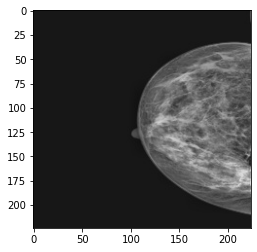

In [ ]:
#Displaying the image
imgplot = plt.imshow(img)

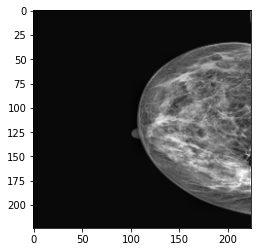

In [ ]:
grayscale_img = img[:, :, 0]
plt.imshow(grayscale_img, cmap='gray')

Text(0.5, 1.0, 'median filtered image')

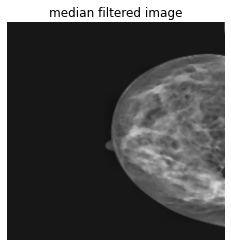

In [ ]:
median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.title("median filtered image")

Text(0.5, 1.0, 'GaussianBlur filter')

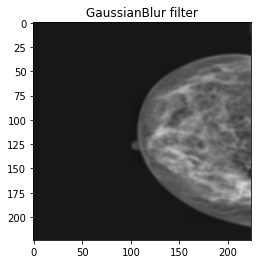

In [ ]:
gb = cv2.GaussianBlur(img, (243,243), 1,1)
imgplot = plt.imshow(gb)
plt.title("GaussianBlur filter")

In [ ]:
#import the library opencv
import cv2
#globbing utility.
import glob
#select the path
#I have provided my path from my local computer, please change it accordingly
path = "/content/drive/My Drive/dataset_train-test/test\*.*"
for file in glob.glob(path):
    image_read = cv2.imread(file)
    # conversion numpy array into rgb image to show
    c = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
    cv2.imshow('Color image', c)
    # wait for 1 second
    k = cv2.waitKey(1000)
    # destroy the window
    cv2.destroyAllWindows()


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping

train_dir=os.path.join("/content/drive/My Drive/dataset_train-test/test")
validate_dir= os.path.join("/content/drive/My Drive/dataset_train-test/train")

train = os.listdir(train_dir)
validate = os.listdir(validate_dir)

fname1 = [os.path.join(train_dir,fname)
        for fname in train[:]]

fname2 = [os.path.join(validate_dir,fname)
        for fname in validate[:]]
ncolu = 9
nrow = 99
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*99)
for i,fname in enumerate(fname1):
    print (fname)
    sp = plt.subplot(99,9,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.imshow(img)
plt.show()

/content/drive/My Drive/dataset_train-test/test/Image_1858.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1847.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1827.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1842.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1822.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1818.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1820.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1836.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1857.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1830.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1848.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1831.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1826.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1853.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1844.jpg
/content/drive/My Drive/dataset_train-test/test/Image_1

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f635a2878c0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 5832x705672 with 891 Axes>

In [ ]:
import PIL
import os
from PIL import Image

In [ ]:
img = mpimg.imread("/content/drive/My Drive/dataset_train-test/test/Image_1.jpg")
print(img.size)

150528


In [ ]:
import PIL
print(PIL.PILLOW_VERSION)


7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [ ]:
#applying median filter 

 from PIL import Image, ImageEnhance
 
image = Image.open( "/content/drive/My Drive/dataset_train-test/test/Image_1.jpg")

contrast = ImageEnhance.Contrast(image)
contrast.enhance(1.5).save('contrast.jpg')


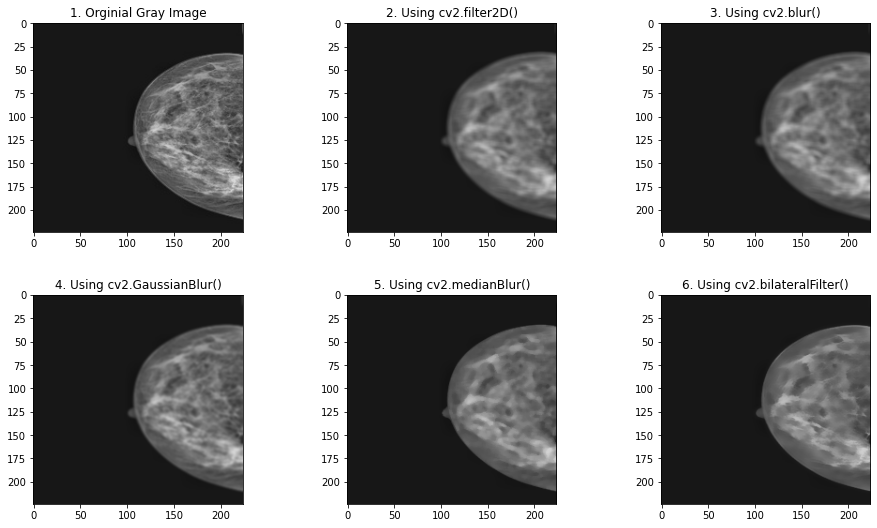

In [ ]:
#******************************************#
'''
This program can be used to apply smoothing (blurring) techniques on brain MRI scan image
All image processing functions are performed on grayscale image (need for opencv tool)
'''
#******************************************#

import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((5,5),np.float32)/25 #for cv2.filter2D()

class smoothing(object):

    def read_image(self,image):
        image_read = cv2.imread(image)
        
        return image_read
    
    '''
    cv2.filter2D() - to convolve the kernel with an image
    '''
    def filter2D(self,image_read):
        image_result = cv2.filter2D(image_read,-1,kernel)
        return image_result
    '''
    Blurring - Low pass filter kernel 
        - removal of noise
        - removes high frequency content (noise, edges)
        - 4 types - averaging, median, gaussian, bilateral
    '''
    '''
    cv2.blur() or cv2.boxFilter() - convolving image with normalized box filter
    - takes avg of pixels under kernel area and replaces central element with this average
    '''
    def averaging(self,image_read):
        image_result = cv2.blur(image_read,(5,5))
        return image_result
    '''
    cv2.GaussianBlur() - remove gaussian noise from the noise
    Instead of box filter with equal coefficients, we specify the width and height of kernel (positive and odd)
    SigmaX Gaussian kernel standard deviation in X direction and SigmaY in Y-direction
    Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average
    '''
    def gaussian(self,image_read):
        image_result = cv2.GaussianBlur(image_read,(5,5),sigmaX=0)
        return image_result
    '''
    cv2.meadianBlur() - computes median of all pixels under the kernel and the central pixel
    is replaced with this median value.
    Effective in removing salt and pepper noise - reduces noise effectively.
    '''
    def median(self,image_read):
        image_result = cv2.medianBlur(image_read,5)
        return image_result
    
    '''
    cv2.bilateralFilter() - noise removal while preserving edges
    bilateral filter = Gaussian filter + multiplicative gaussian filter component which is a function of pixel intensity differences.
    - sptail neigbors + intensity domain
    '''
    def bilateral(self,image_read):
        image_result = cv2.bilateralFilter(image_read,9,75,75)
        return image_result

_inst = smoothing()
read_image = _inst.read_image
filter2D = _inst.filter2D
averaging = _inst.averaging
gaussian = _inst.gaussian
median = _inst.median
bilateral = _inst.bilateral

image_path = "/content/drive/My Drive/dataset_train-test/test/Image_1.jpg"
tumor = read_image(image_path)

filter2D = filter2D(tumor)
averaging = averaging(tumor)
gaussian = gaussian(tumor)
median = median(tumor)
bilateral = bilateral(tumor)

#####################################
## Plotting all stages of image blurring ##
#####################################
fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.5)

axs = axs.ravel()

axs[0].imshow(tumor,'gray')
axs[0].set_title('1. Orginial Gray Image')
axs[1].imshow(filter2D,'gray')
axs[1].set_title('2. Using cv2.filter2D()')
axs[2].imshow(averaging,'gray')
axs[2].set_title('3. Using cv2.blur()')
axs[3].imshow(gaussian,'gray')
axs[3].set_title('4. Using cv2.GaussianBlur()')
axs[4].imshow(median,'gray')
axs[4].set_title('5. Using cv2.medianBlur()')
axs[5].imshow(bilateral,'gray')
axs[5].set_title('6. Using cv2.bilateralFilter()')

plt.show()

    
    

#Image Segmentation

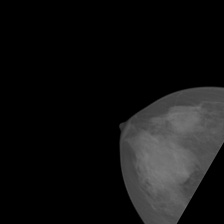

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Applying Segmentation techniques to a single image for better Understanding 

---



[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 8  5  7 -1]
  [-1 -1 -1  6]
  [ 9  6 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [-1 13 15 -1]
  [-1 -1 -1 14]]]


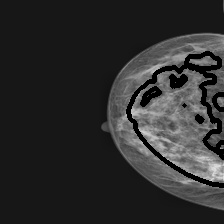

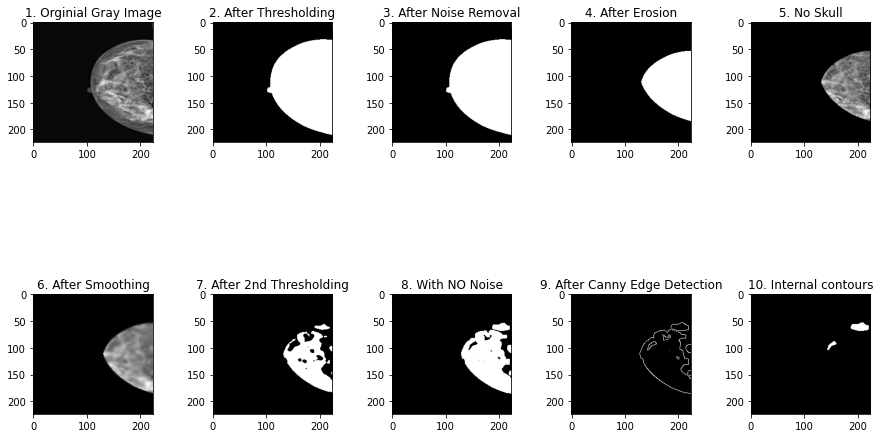

In [ ]:
#******************************************#
'''
This program can be used to apply image processing techniques on Mammogram image
All image processing functions are performed on grayscale image (need for opencv tool)
'''
#******************************************#

import cv2
import numpy as np 
import matplotlib.pyplot as plt

#creating a filter of ones like a small blur

kernel = np.ones((7,7),np.uint8)

######################
### Defining a segmentation class #####
######################

class segmentation(object):

    def read_image(self,image):
        image_read = cv2.imread(image)
        image_gray = cv2.cvtColor(image_read,cv2.COLOR_BGR2GRAY)

        return image_gray

    #Binarization
    def binary(self,image_gray):
        ret,th1 = cv2.threshold(image_gray,30,255,cv2.THRESH_BINARY)
        #noise removal
        image_closing = cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernel)

        return image_closing,th1
    #remove skull 
    def skull_removal(self,image_closing,image):
        erosion = cv2.erode(image_closing,kernel,iterations=7)
        without_skull = image*(-erosion)

        return erosion, without_skull
    
    def enhance(self,without_skull):
        #median = cv2.medianBlur(without_skull,5)
        #blur = cv2.GaussianBlur(median,(5,5),0)

        blur = cv2.bilateralFilter(without_skull,9,75,75)

        return blur
    
    def segmentation_back(self,blur):
        kernel1 = np.ones((5,5),np.uint8)
        ret, th2 = cv2.threshold(blur,100,65,cv2.THRESH_BINARY)
        #remove noise
        no_noise = cv2.morphologyEx(th2,cv2.MORPH_DILATE,kernel1)

        return th2, no_noise
    
    def edge_detection(self,th2):
        edges = cv2.Canny(th2,150,200)

        return edges
    
    def contour_map(self,edges,image):
        contours,hierarchy=cv2.findContours(edges,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
        internal_contours = np.zeros(image.shape)

        for i in range(len(contours)):
            if hierarchy[0][i][3] != -1: 
                cv2.drawContours(internal_contours,contours,i,255,-1)

        return contours,internal_contours,hierarchy

#declaring the functions in the class
_inst = segmentation()

read_image = _inst.read_image
binarization = _inst.binary
skull_removal = _inst.skull_removal
enhance = _inst.enhance
seg_back = _inst.segmentation_back
edge_detect = _inst.edge_detection
contour_map = _inst.contour_map

#linking the functions with the variables
image_path = "/content/drive/My Drive/dataset_train-test/test/Image_1.jpg"
tumor = read_image(image_path)
binarization_results = binarization(tumor)
skull_removal = skull_removal(binarization_results[0],tumor) #image closing and image
enhance = enhance(skull_removal[1]) #without skull image
seg_back = seg_back(enhance) #blur image
edge_detect = edge_detect(seg_back[1]) #threshold back
contour_map = contour_map(edge_detect,tumor)

#####################################
## Plotting all stages of image processing ##
#####################################
fig, axs = plt.subplots(2,5, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.5)

axs = axs.ravel()

axs[0].imshow(tumor,'gray')
axs[0].set_title('1. Orginial Gray Image')
axs[1].imshow(binarization_results[0],'gray')
axs[1].set_title('2. After Thresholding')
axs[2].imshow(binarization_results[1],'gray')
axs[2].set_title('3. After Noise Removal')
axs[3].imshow(skull_removal[0],'gray')
axs[3].set_title('4. After Erosion')
axs[4].imshow(skull_removal[1],'gray')
axs[4].set_title('5. No Skull')
axs[5].imshow(enhance,'gray')
axs[5].set_title('6. After Smoothing')
axs[6].imshow(seg_back[0],'gray')
axs[6].set_title('7. After 2nd Thresholding')
axs[7].imshow(seg_back[1],'gray')
axs[7].set_title('8. With NO Noise')
axs[8].imshow(edge_detect,'gray')
axs[8].set_title('9. After Canny Edge Detection')
axs[9].imshow(contour_map[1],'gray')
axs[9].set_title('10. Internal contours')

#plotting final image with internal contour mapping
print(contour_map[2])
cv2.drawContours(tumor,contour_map[0],-1,(0,255,0),3)
cv2_imshow(tumor)
cv2.imwrite('tumor.jpg',tumor)
cv2.waitKey(0)

plt.show()


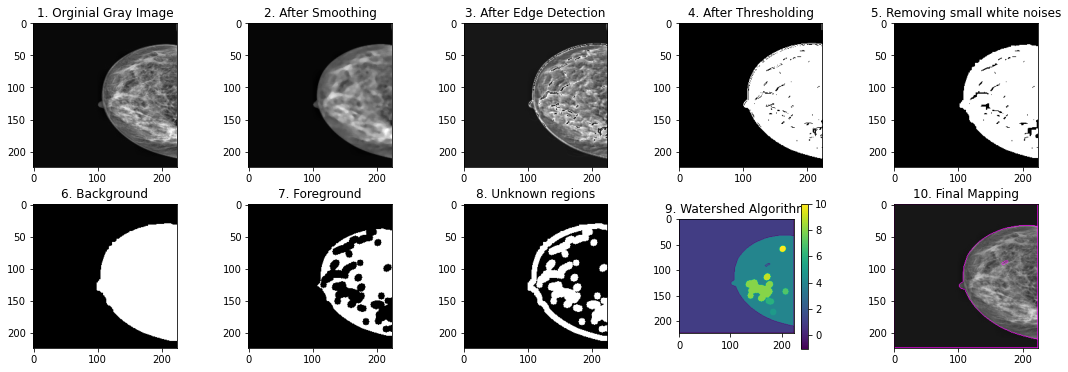

In [ ]:
#*******************************************************#
'''
Program to implement watershed algorithm step by step to perfom image segmentation
of the Mammogram image.
'''
#*******************************************************#

''' Description
- Grayscale images seen as topographic surface
- High intensity  = peaks and hills
- Low intensity = valley
- Fill isolated valleys - local minima with colored water (labels)
- With water rising, peaks (gradient) with different colors tends to merge
- This approach gives oversegmented results due to noise or other irregularities in the image
- So in opencv, we have an approach based on marker watershed algorithm where we can specify
  which are valley poiints to be merged.
- It is an interactive image segmentation
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed(image):

    ###################PREPROCESSING

    #Read the image and convert to gray scale
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #smoothing the image
    img_median = cv2.medianBlur(img_gray,5)
    #edge detection using sobelX, sobelY
    img_sobelx = cv2.Sobel(img_median,cv2.CV_8U,dx=1,dy=0,ksize=3)
    img_sobely = cv2.Sobel(img_median,cv2.CV_8U,dx=0,dy=1,ksize=3)

    img_sobel = img_sobelx+img_sobely+img_gray

    ret, th1 = cv2.threshold(img_sobel,55,255,cv2.THRESH_BINARY)

    #having foreground and background image
    kernel = np.ones((3,3),np.uint8)
    # To remove any small white noises in the image using morphological opening
    opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN,kernel,iterations=2)

    #background
    # Black region shows sure background area
    # Dilation increases object boundary to background.
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    #white region shows sure foreground region
    dist = cv2.distanceTransform(opening,distanceType=cv2.DIST_L2, maskSize=5)

    ret,sure_fg = cv2.threshold(dist, 0.2*dist.max(),255,0) #threshold value needs to change if tumor is not segmented 

    # Identifying regions where we don't know whether foreground and background
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    #######Waterhsed algorithm

    contours, hierarchy = cv2.findContours(sure_fg,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #numpy array for amrkers 

    marker = np.zeros((img_gray.shape[0],img_gray.shape[1]),dtype=np.int32)
    marker = np.int32(sure_fg)+np.int32(sure_bg)

    #marker labeling

    for i in range(len(contours)):
        cv2.drawContours(marker,contours,i,i+2,-1)
    
    marker = marker + 1 #to make sure background is not black 0
    marker[unknown==255] = 0 #unknown regions as 0 

    copy_img = img.copy()
    cv2.watershed(copy_img,marker)

    copy_img[marker == -1] = [255,0,255]

    return img_gray,img_median, img_sobel, th1,opening,sure_bg,sure_fg,unknown,marker,copy_img

### Image data
image_path = "/content/drive/My Drive/dataset_train-test/test/Image_1.jpg"

#preprocessing function
tumor = watershed(image_path)[0]
img_median = watershed(image_path)[1]
img_sobel = watershed(image_path)[2]
threshold = watershed(image_path)[3]
opening = watershed(image_path)[4]
sure_bg = watershed(image_path)[5]
sure_fg = watershed(image_path)[6]
unknown= watershed(image_path)[7]
marker = watershed(image_path)[8]
img_mapped = watershed(image_path)[9]
#####################################
## Plotting all stages of watershed algorithm ##
#####################################

fig, axs = plt.subplots(2,5, figsize=(18,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.5)

axs = axs.ravel()

axs[0].imshow(tumor,'gray')
axs[0].set_title('1. Orginial Gray Image')
axs[1].imshow(img_median,'gray')
axs[1].set_title('2. After Smoothing')
axs[2].imshow(img_sobel,'gray')
axs[2].set_title('3. After Edge Detection')
axs[3].imshow(threshold,'gray')
axs[3].set_title('4. After Thresholding')
axs[4].imshow(opening,'gray')
axs[4].set_title('5. Removing small white noises')
axs[5].imshow(sure_bg,'gray')
axs[5].set_title('6. Background')
axs[6].imshow(sure_fg,'gray')
axs[6].set_title('7. Foreground')
axs[7].imshow(unknown,'gray')
axs[7].set_title('8. Unknown regions')
axs[8].imshow(marker)
axs[8].set_title('9. Watershed Algorithm')
axs[9].imshow(img_mapped)
axs[9].set_title('10. Final Mapping')

fig.colorbar(axs[8].imshow(marker),ax=axs[8])

plt.show()

#Edge based Segmentation

What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image. To detect edges, we will use filters and convolutions. Choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).

One such weight matrix is the sobel operator. It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges.

Sobel filter (horizontal) =

[1 2 1

0 0 0

-1 -2 -1]

Sobel filter (vertical) =

[-1 0 1

-2 0 2

-1 0 1]

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [ ]:
%cd ./drive/My Drive/dataset_train-test

/content/drive/My Drive/dataset_train-test


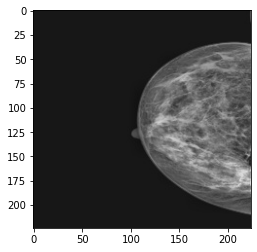

In [ ]:
image = plt.imread("/content/drive/My Drive/dataset_train-test/test/Image_1.jpg")
plt.imshow(image)

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
print()
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

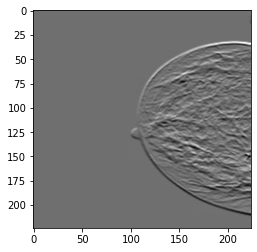

In [ ]:
plt.imshow(out_h, cmap='gray')

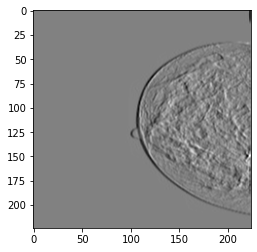

In [ ]:
plt.imshow(out_v, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


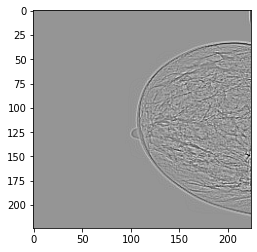

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

#Region based Segmentation

(224, 224, 3)


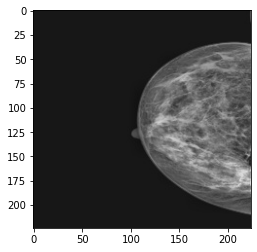

In [ ]:
image  = plt.imread(("/content/drive/My Drive/dataset_train-test/test/Image_1.jpg"))
print(image.shape)
plt.imshow(image)

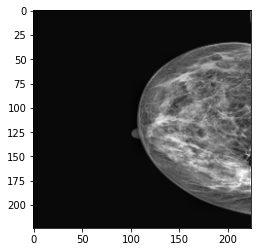

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

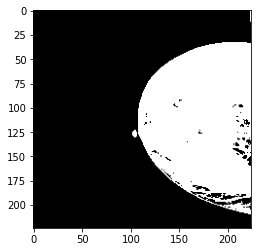

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

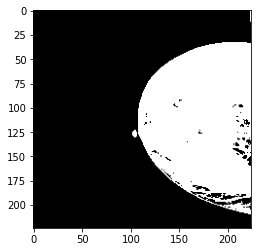

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

There are four different segments in the above image. Some of the advantages of this method are: Calculations are simpler, Fast operation speed, When the object and background have high contrast, this method performs really well.

But there are some limitations to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.cluster import KMeans
import cv2
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

In [ ]:
datasetFolder ="/content/drive/My Drive/dataset_train-test/test"

In [ ]:
dataset = pathlib.Path(datasetFolder)

In [ ]:
list_images = list(dataset.glob("*.*"))

In [ ]:
img = cv2.imread(os.path.join(list_images[1]))
plt.imshow(img)
plt.show()

In [ ]:
def ExtractFeatures(test_image):
  res = tf.keras.layers.Conv2D(32, (3, 3),activation = "relu", input_shape = (224, 224, 3), padding='same')(test_image)
  res = tf.keras.layers.MaxPool2D(2, 2)(res)
  res = tf.keras.layers.Dropout(0.2)(res)
  res = tf.keras.layers.Conv2D(16, (3, 3),activation = "relu", padding='same')(res)
  res = tf.keras.layers.MaxPool2D(2, 2)(res)
  res = tf.keras.layers.Dropout(0.2)(res)
  res = tf.keras.layers.Conv2D(8, (3, 3),activation = "relu", padding='same')(res)
  res = tf.keras.layers.MaxPool2D(2, 2)(res)
  res = tf.keras.layers.Dropout(0.2)(res)
  res = tf.keras.layers.Flatten()(res)
  return np.asarray(res[0])

In [ ]:
def expand_dims_image(image):
  return np.expand_dims(image, axis = 0)

In [ ]:
data = []
for img in list_images:
  img_ = cv2.imread(os.path.join(img))
  img_ = cv2.resize(img_, (224, 224))
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
  img_ = img_ / 255
  me = np.mean(img_)
  img_ = img_ - me
  img_ = img_ / np.std(img_)
  data.append(img_)

In [ ]:
data = np.asarray(data)

In [ ]:
data.shape

(1918, 224, 224, 3)

In [ ]:
data[0]

array([[[ 0.455066  ,  0.455066  ,  0.455066  ],
        [ 1.04180596,  1.04180596,  1.04180596],
        [ 1.06437288,  1.06437288,  1.06437288],
        ...,
        [ 3.88523806,  3.88523806,  3.88523806],
        [ 4.29144265,  4.29144265,  4.29144265],
        [ 1.38030978,  1.38030978,  1.38030978]],

       [[ 0.59046753,  0.59046753,  0.59046753],
        [ 1.33517594,  1.33517594,  1.33517594],
        [ 1.15464057,  1.15464057,  1.15464057],
        ...,
        [ 3.45646655,  3.45646655,  3.45646655],
        [ 4.15604112,  4.15604112,  4.15604112],
        [ 1.29004209,  1.29004209,  1.29004209]],

       [[ 0.54533369,  0.54533369,  0.54533369],
        [ 1.42544362,  1.42544362,  1.42544362],
        [ 1.29004209,  1.29004209,  1.29004209],
        ...,
        [ 2.95999428,  2.95999428,  2.95999428],
        [ 4.17860804,  4.17860804,  4.17860804],
        [ 1.35774286,  1.35774286,  1.35774286]],

       ...,

       [[-0.69584699, -0.69584699, -0.69584699],
        [-0

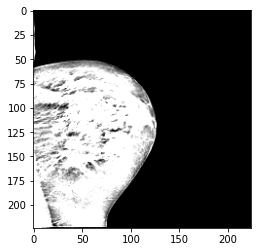

In [ ]:
plt.imshow(data[2])
plt.show()

In [ ]:
list_features = []
for img in data:
  img = expand_dims_image(img)
  features = ExtractFeatures(img)
  list_features.append(features)

In [ ]:
list_features = np.asarray(list_features)

In [ ]:
list_features.shape

(1918, 6272)

In [ ]:
def modelClustering(n_clusters, data):
  return KMeans(n_clusters = n_clusters, random_state=0).fit(data)

In [ ]:
def drawingResult(result_pca, labels, labels_centered):
  plt.rcParams["figure.figsize"] = (10,10)
  plt.scatter(result_pca[:,0], result_pca[:,1], c = labels, alpha=0.5, s=150)
  plt.scatter(labels_centered[:, 0], labels_centered[:, 1],
              marker='X', s=200, linewidths=1.5, color='red', edgecolors="black", lw=1.5)
  plt.title('COVID-19 Clustring')
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')